# CV Assignment 2

In [49]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline


## Canny edge detector

img = cv2.imread("flower.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


threshold_1 = 100
threshold_2 = 150
edges = cv2.Canny(img,threshold_1,threshold_2)

### Image with edge detection

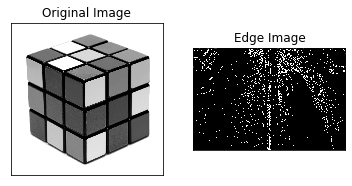

In [51]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Hough Transform - Lines

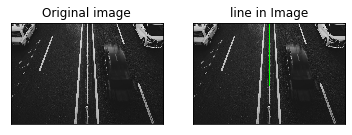

In [55]:
img = cv2.imread('lines.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,100,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))


    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('line in Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Hough transform - Circle

In [12]:
img = cv2.imread('circle.png',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
grey = cimg.copy()
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=100,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

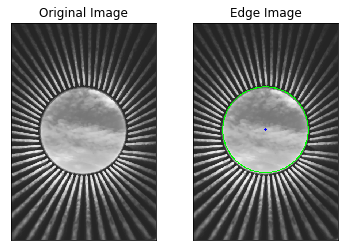

In [54]:
plt.subplot(121),plt.imshow(grey,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cimg,cmap = 'gray')
plt.title('circle in Image'), plt.xticks([]), plt.yticks([])

plt.show()


## Harris Corner Detector

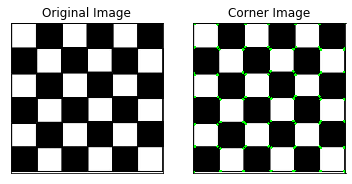

In [56]:
filename = 'chess.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# print(dst)
# Threshold for an optimal value, it may vary depending on the image.
# img[dst>0.01*dst.max()]=[0,255,0]
thresh = 0.1*dst.max()
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( img, (i, j), 1, (0,255,0), 4)

plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Corner Image'), plt.xticks([]), plt.yticks([])

plt.show()


## Fast Corner Detector

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 1606
Total Keypoints without nonmaxSuppression: 6389


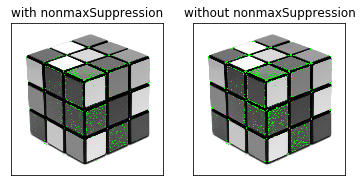

In [48]:
img = cv2.imread('cube.jpg',0)
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
# plt.imshow(img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv2.drawKeypoints(img, kp, None, color=(0,255,0))
# plt.imshow(img3)
plt.subplot(121),plt.imshow(img2,cmap = 'gray')
plt.title('with nonmaxSuppression'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img3,cmap = 'gray')
plt.title('without nonmaxSuppression'), plt.xticks([]), plt.yticks([])
plt.show()